In [2]:
df = read.csv('bank-additional-full.csv', sep=';')
head(df)

age job       marital education   default housing loan contact   month
1 56  housemaid married basic.4y    no      no      no   telephone may  
2 57  services  married high.school unknown no      no   telephone may  
3 37  services  married high.school no      yes     no   telephone may  
4 40  admin.    married basic.6y    no      no      no   telephone may  
5 56  services  married high.school no      no      yes  telephone may  
6 45  services  married basic.9y    unknown no      no   telephone may  
  day_of_week ... campaign pdays previous poutcome    emp.var.rate
1 mon         ... 1        999   0        nonexistent 1.1         
2 mon         ... 1        999   0        nonexistent 1.1         
3 mon         ... 1        999   0        nonexistent 1.1         
4 mon         ... 1        999   0        nonexistent 1.1         
5 mon         ... 1        999   0        nonexistent 1.1         
6 mon         ... 1        999   0        nonexistent 1.1         
  cons.price.idx cons.conf.idx euribor3m nr.employed y 
1 93.994         -36.4         4.857     5191        no
2 93.994         -36.4         4.857     5191        no
3 93.994         -36.4         4.857     5191        no
4 93.994         -36.4         4.857     5191        no
5 93.994         -36.4         4.857     5191        no
6 93.994         -36.4         4.857     5191        no

In [3]:
str(df)

'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : chr  "housemaid" "services" "services" "admin." ...
 $ marital       : chr  "married" "married" "married" "married" ...
 $ education     : chr  "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ default       : chr  "no" "unknown" "no" "no" ...
 $ housing       : chr  "no" "no" "yes" "no" ...
 $ loan          : chr  "no" "no" "no" "no" ...
 $ contact       : chr  "telephone" "telephone" "telephone" "telephone" ...
 $ month         : chr  "may" "may" "may" "may" ...
 $ day_of_week   : chr  "mon" "mon" "mon" "mon" ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : int  999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "nonexistent" ...
 $ emp.var.rate  : num  1.1 1.1 1.1 1

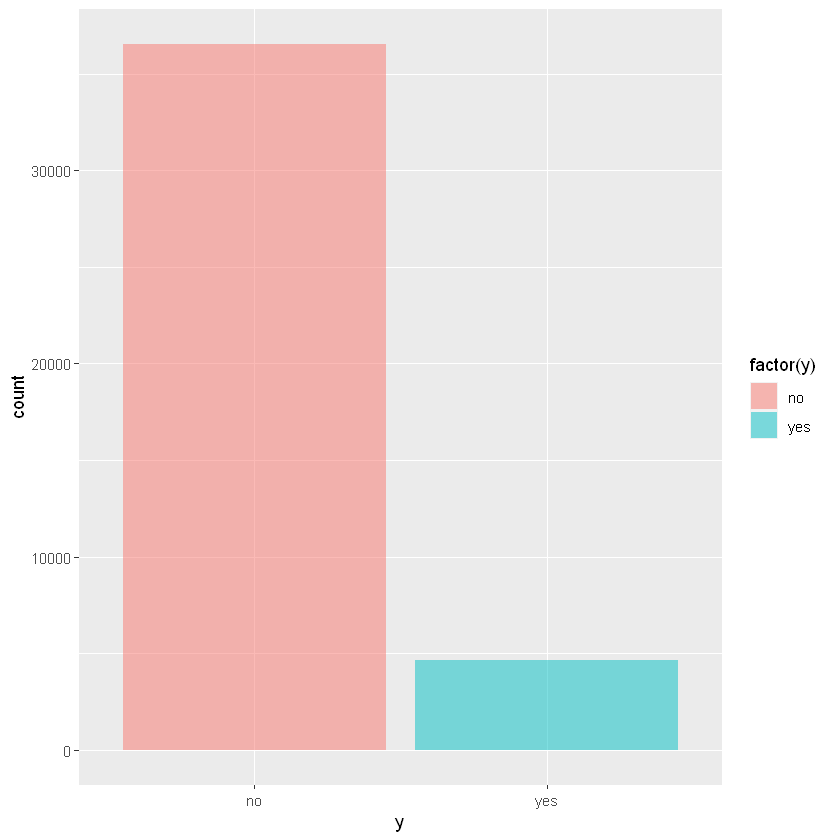

In [4]:
library(ggplot2)
ggplot(df,aes(y)) + geom_bar(aes(fill=factor(y)),alpha=0.5)

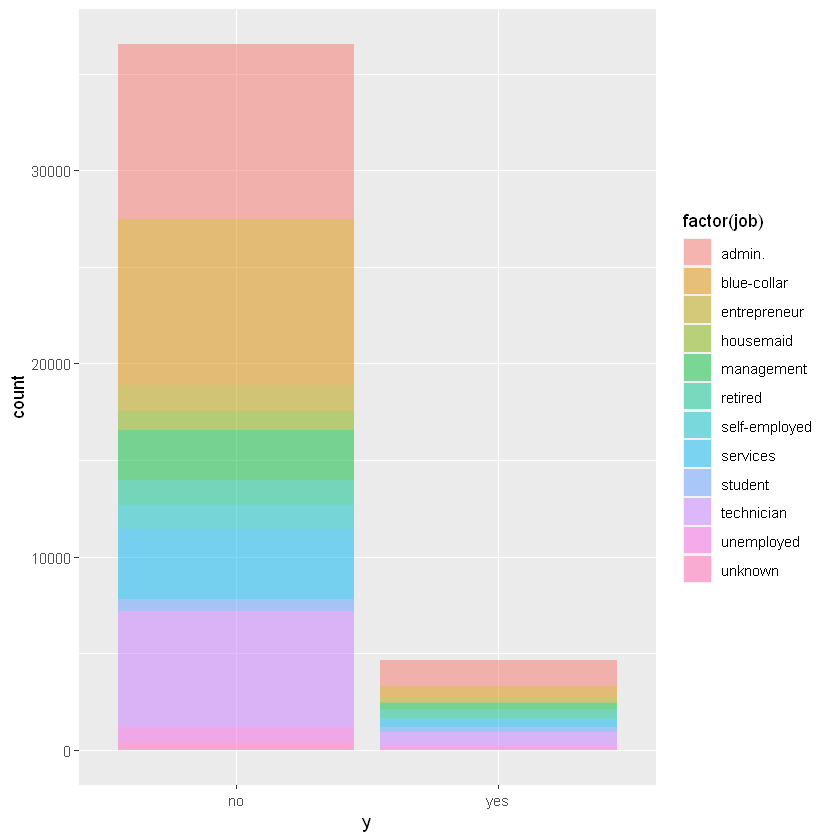

In [5]:
ggplot(df,aes(y)) + geom_bar(aes(fill=factor(job)),alpha=0.5)

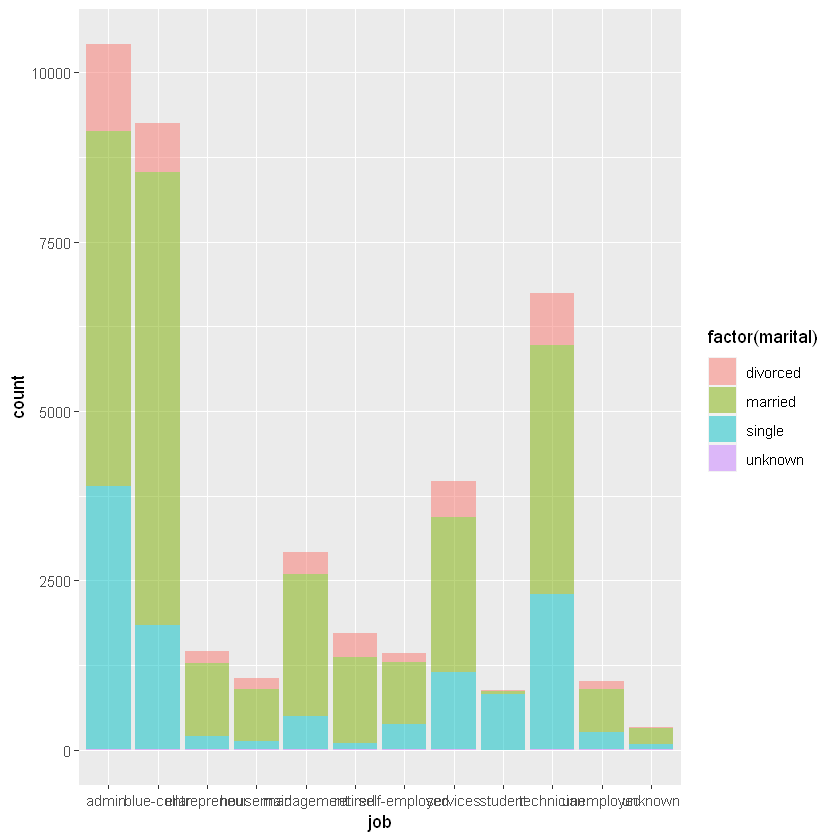

In [12]:
ggplot(df,aes(job)) + geom_bar(aes(fill=factor(marital)),alpha=0.5)

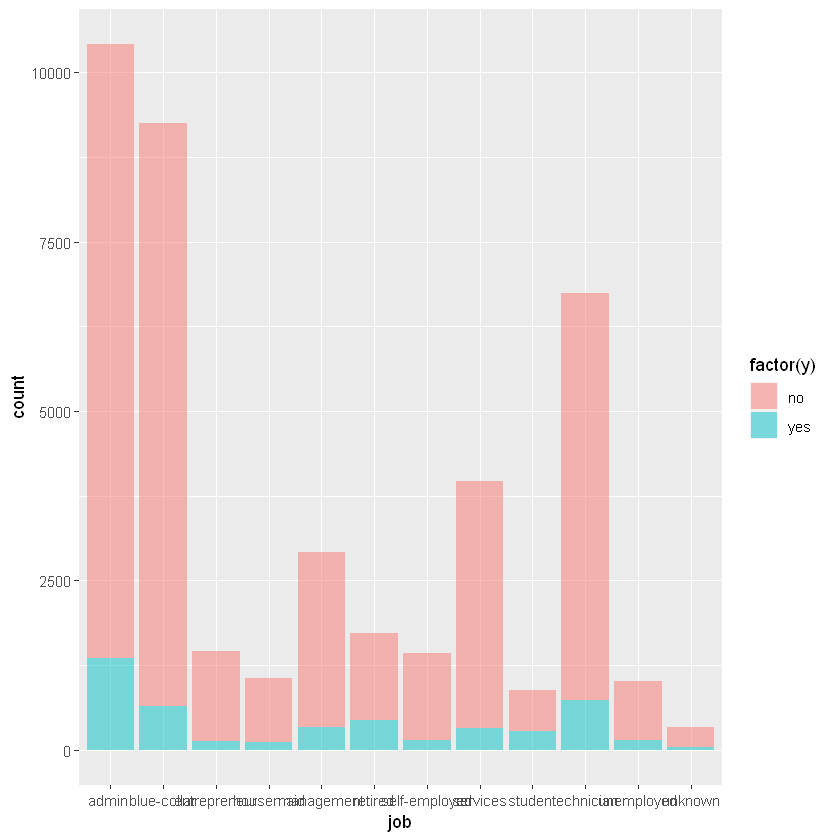

In [6]:
ggplot(df,aes(job)) + geom_bar(aes(fill=factor(y)),alpha=0.5)

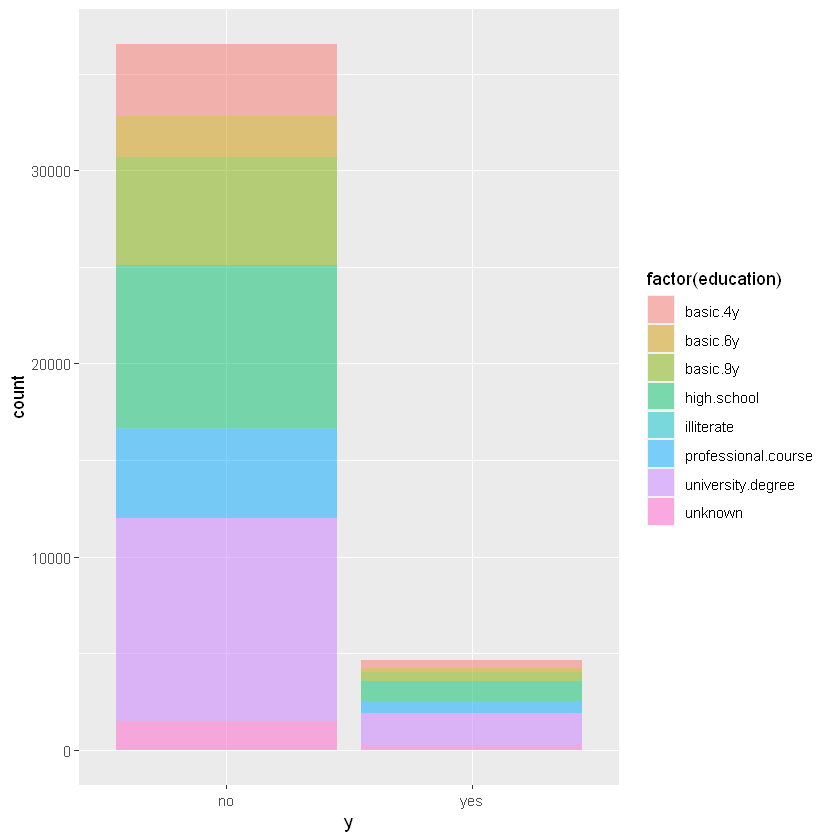

In [7]:
ggplot(df,aes(y)) + geom_bar(aes(fill=factor(education)),alpha=0.5)

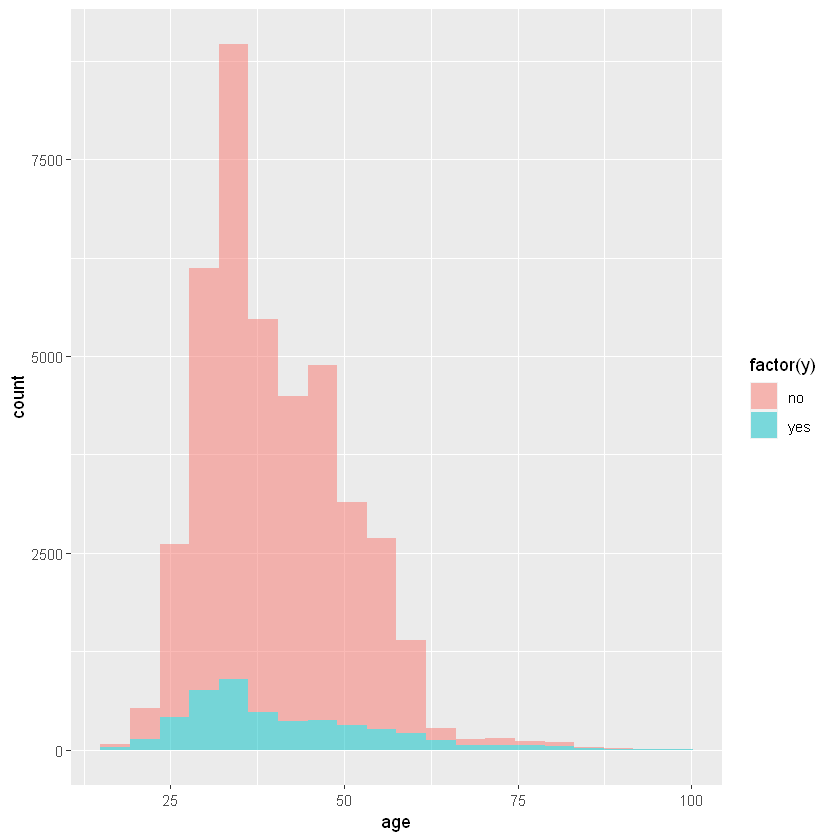

In [8]:
ggplot(df,aes(age)) + geom_histogram(aes(fill=factor(y)),bins=20,alpha=0.5)

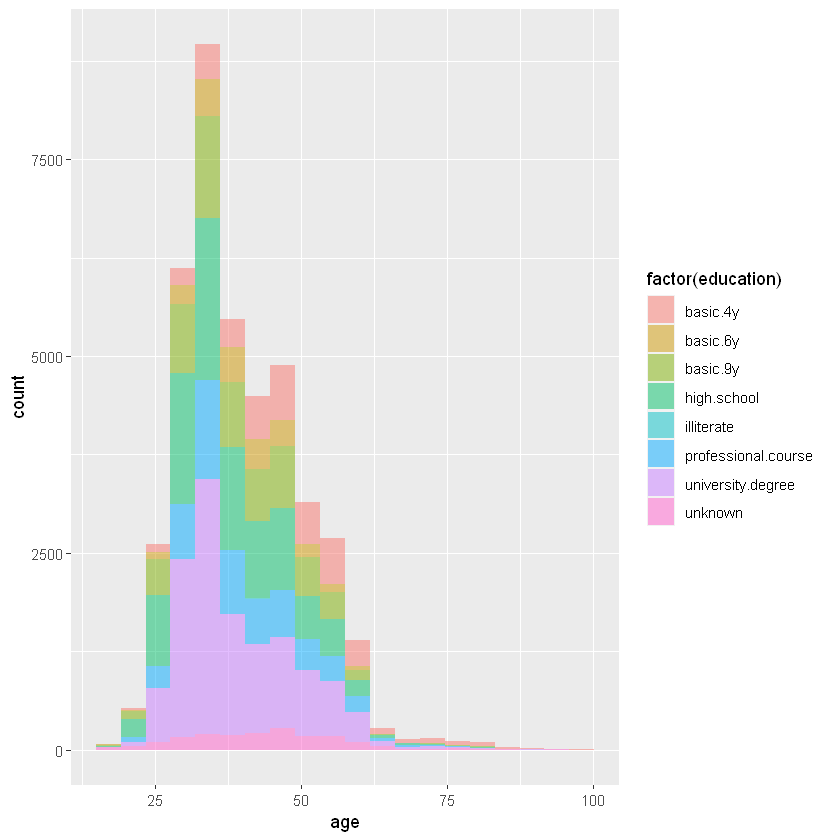

In [9]:
ggplot(df,aes(age)) + geom_histogram(aes(fill=factor(education)),bins=20,alpha=0.5)

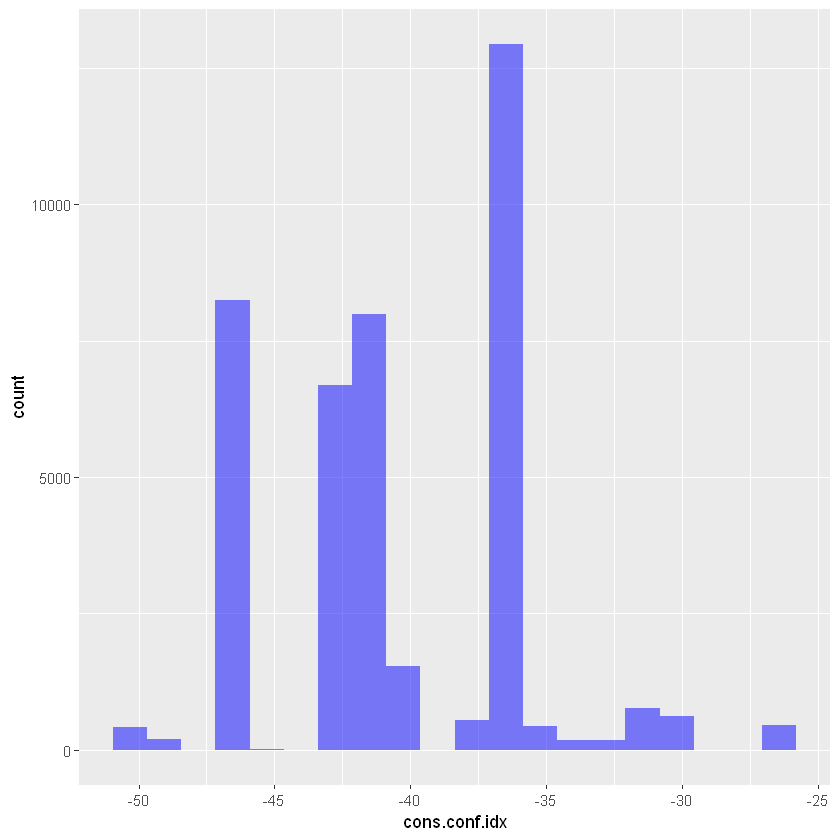

In [10]:
ggplot(df,aes(cons.conf.idx)) + geom_histogram(fill='blue',bins=20,alpha=0.5)

In [11]:
any(is.na(df))

[1] FALSE

In [13]:
chr.cols <- sapply(df, is.character)
new.df = df[chr.cols]

library(superml)

label <- LabelEncoder$new()
c = colnames(new.df)

for(i in c){
    df[[i]] = label$fit_transform(df[[i]])
}

Loading required package: R6



In [14]:
head(df)

age job marital education default housing loan contact month day_of_week ...
1 56  0   0       0         0       0       0    0       0     0           ...
2 57  1   0       1         1       0       0    0       0     0           ...
3 37  1   0       1         0       1       0    0       0     0           ...
4 40  2   0       2         0       0       0    0       0     0           ...
5 56  1   0       1         0       0       1    0       0     0           ...
6 45  1   0       3         1       0       0    0       0     0           ...
  campaign pdays previous poutcome emp.var.rate cons.price.idx cons.conf.idx
1 1        999   0        0        1.1          93.994         -36.4        
2 1        999   0        0        1.1          93.994         -36.4        
3 1        999   0        0        1.1          93.994         -36.4        
4 1        999   0        0        1.1          93.994         -36.4        
5 1        999   0        0        1.1          93.994         -36.4        
6 1        999   0        0        1.1          93.994         -36.4        
  euribor3m nr.employed y
1 4.857     5191        0
2 4.857     5191        0
3 4.857     5191        0
4 4.857     5191        0
5 4.857     5191        0
6 4.857     5191        0

In [15]:
library(caTools)
set.seed(101)

split = sample.split(df$age, SplitRatio = 0.70)

train = subset(df, split == TRUE)
test = subset(df, split == FALSE)

In [18]:
library(e1071)
classifier = svm(formula = y ~ .,data = train, type = 'C-classification', kernel = 'linear')

In [19]:
pred = predict(classifier, test)

In [22]:
summary(classifier)


Call:
svm(formula = y ~ ., data = train, type = "C-classification", kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  5898

 ( 2951 2947 )


Number of Classes:  2 

Levels: 
 0 1




In [23]:
misClasificError <- mean(pred != test$y)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.900938815150534"


In [24]:
library(e1071)
classifier = svm(formula = y ~ .,data = train, type = 'C-classification', kernel = 'radial')

pred = predict(classifier, test)

misClasificError <- mean(pred != test$y)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.911460019423762"


In [25]:
library(e1071)
classifier = svm(formula = y ~ .,data = train, type = 'C-classification', kernel = 'sigmoid')

pred = predict(classifier, test)

misClasificError <- mean(pred != test$y)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.855373907413402"
